<a href="https://colab.research.google.com/github/tomi-kid/Ai_Mode_Transfer_Learning/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Here we are going to classify and predict if a face has mask or not**

In [ ]:
#importing the necessary libraries
import numpy as np
import keras
import shutil
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
pip install kaggle

SyntaxError: ignored

In [ ]:
#assigning image paths to variables
mask_data = "C:\\Users\\somebody\\Desktop\\input\\Mask\\Mask\\"
no_mask_data = "C:\\Users\\somebody\\Desktop\\input\\No Mask\\No Mask\\"

'/content'

Now let us see the total no of images in each folder

In [ ]:
total_mask_images = os.listdir(mask_data)
print("no of mask images:: {}".format(len(total_mask_images)))
total_nonmask_images = os.listdir(no_mask_data)
print("no of non-mask images:: {}".format(len(total_nonmask_images)))

FileNotFoundError: ignored

There is very less images to work with.
So first we will create directory for training and testing folder

In [ ]:
os.makedirs('./train/mask')
os.makedirs('./train/no mask')
os.makedirs('./test/mask')
os.makedirs('./test/no mask')

Now the directory is created let us randomly select 100 images for training and 30 images for testing from each mask and non-masked folder

In [ ]:
for images in random.sample(total_mask_images,100):
    shutil.copy(mask_data+images, './train/mask')
for images in random.sample(total_mask_images,30):
    shutil.copy(mask_data+images, './test/mask')
for images in random.sample(total_nonmask_images,100):
    shutil.copy(no_mask_data+images, './train/no mask')
for images in random.sample(total_nonmask_images,30):
    shutil.copy(no_mask_data+images, './test/no mask')

Now as we have less images to work with we will use augmented method to get differnt forms of each image.

In [ ]:
train_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
            flow_from_directory('./train', target_size=(224,224), batch_size=32, class_mode = 'categorical')
test_batch = ImageDataGenerator(rescale=1./255).\
            flow_from_directory('./test', target_size = (224,224), batch_size=32, class_mode='categorical')

Found 198 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


Well we see training and testing folder has 199 and 30 images respectively with 2 classes.

In [ ]:
train_batch.class_indices

{'mask': 0, 'no mask': 1}

we see that mask indicates '0' while non mask indicates '1. so let us create a list with this info

In [ ]:
class_mask = ['mask', 'no mask']

As we have very less images we will directly use a powerful pretrained model VGG16 to get high accuracy

In [ ]:
#import vgg16
from keras.applications.vgg16 import VGG16

In [ ]:
#vgg16 accepts image size (224,224) only
IMAZE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAZE_SIZE+[3], weights='imagenet', include_top=False)

NameError: ignored

Now vgg16 is ready. We will look at how the model looks

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We see that trainable parameter is 14,714,688. As the model is already trained we will avoid this.

In [ ]:
for layers in vgg.layers:
    layers.trainable = False

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now our trainable parameter is 0. We can add our layers in the model

In [ ]:
flatten_layer = keras.layers.Flatten()(vgg.output)
prediction_layer = keras.layers.Dense(2, activation='softmax')(flatten_layer)

Finally creating the model

In [ ]:
model = keras.models.Model(inputs = vgg.input, outputs = prediction_layer)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Our model is ready. Lets train

In [ ]:
r = model.fit_generator(train_batch, validation_data=test_batch, epochs=5, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))

Epoch 1/5
7/7 [==============================] - 64s 9s/step - loss: 0.3759 - accuracy: 0.8283 - val_loss: 0.4610 - val_accuracy: 0.7414
Epoch 2/5
7/7 [==============================] - 64s 9s/step - loss: 0.4314 - accuracy: 0.8232 - val_loss: 0.4425 - val_accuracy: 0.8793
Epoch 3/5
7/7 [==============================] - 72s 10s/step - loss: 0.2776 - accuracy: 0.8636 - val_loss: 0.2588 - val_accuracy: 0.9138
Epoch 4/5
7/7 [==============================] - 63s 9s/step - loss: 0.1704 - accuracy: 0.9293 - val_loss: 0.3502 - val_accuracy: 0.9138
Epoch 5/5
7/7 [==============================] - 64s 9s/step - loss: 0.1495 - accuracy: 0.9394 - val_loss: 0.2254 - val_accuracy: 0.9655


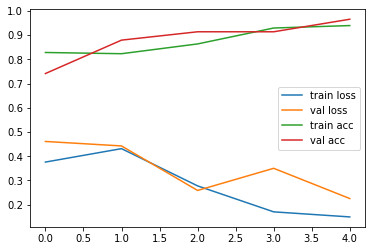

In [ ]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()


plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

Lets test our model

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

no mask


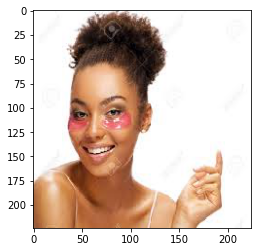

In [ ]:
img = image.load_img('../input/facemask-dataset/No Mask/No Mask/No Mask109.jpg', target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)

mask


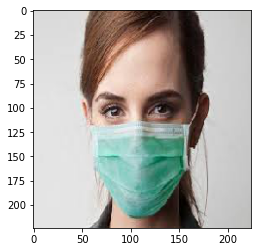

In [ ]:
img = image.load_img('../input/facemask-dataset/Mask/Mask/Mask214.jpeg', target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)

Our model is doing great but due to lack of training image it may not be perfect. Hopefully you find this useful and do give an upvote.
Thank you